In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


In [12]:

# Load data and train model
df = pd.read_csv("AAPL_data.csv")
df = df.drop(['index', 'time', 'high', 'low'], axis=1)

# Standardize data
def standardize(df):
    return (df - df.mean()) / df.std()

mean_open = df['open'].mean()
std_open = df['open'].std()
mean_volume = df['volume'].mean()
std_volume = df['volume'].std()
mean_close = df['close'].mean()
std_close = df['close'].std()

df = standardize(df)

# Split data
total_examples = len(df)
train_ratio = 0.8
train_examples = int(total_examples * train_ratio)
X_train = df[['open', 'volume']].to_numpy()[:train_examples]
y_train = df['close'].to_numpy()[:train_examples]
X_test = df[['open', 'volume']].to_numpy()[train_examples:]
y_test = df['close'].to_numpy()[train_examples:]

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction function
def predict_closing_price(open_price, volume):
    open_std = (open_price - mean_open) / std_open
    volume_std = (volume - mean_volume) / std_volume
    predicted_close_std = model.predict(np.array([[open_std, volume_std]]))
    predicted_close = predicted_close_std * std_close + mean_close
    return predicted_close[0]


In [13]:
print(X_train)

[[-1.51116317  1.03960154]
 [-1.50225453  0.06779016]
 [-1.49207323 -0.67969405]
 ...
 [ 0.30327174  2.27792704]
 [ 0.24867452  2.17408893]
 [ 0.29054511  0.40988906]]


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(X, y):
    regr = LinearRegression()
    regr.fit(X, y)
    
    y_pred = regr.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print("MSE:", mse)
    print("R2:", r2)
    
    coef_df = pd.DataFrame(regr.coef_, ["open", "volume"], columns=['Coefficients'])
    
    return coef_df



In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_test(X, y, test_X, test_y):
    regr = LinearRegression()

    regr.fit(X, y)

    test_predictions = regr.predict(test_X)

    mse_test = mean_squared_error(test_y, test_predictions)
    r2_test = r2_score(test_y, test_predictions)
    
    print("MSE (Test):", mse_test)
    print("R2 (Test):", r2_test)

    coef_df = pd.DataFrame(regr.coef_, ["open", "volume"], columns=['Coefficients'])

    return coef_df




In [18]:
print("Training data")

results = linear_regression(X_train, y_train)
print(results)
print("\n\nTesting data")

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training data
MSE: 0.006099805803696774
R2: 0.994484909778117
        Coefficients
open        0.996406
volume      0.002154


Testing data
Training samples: 518
Testing samples: 130


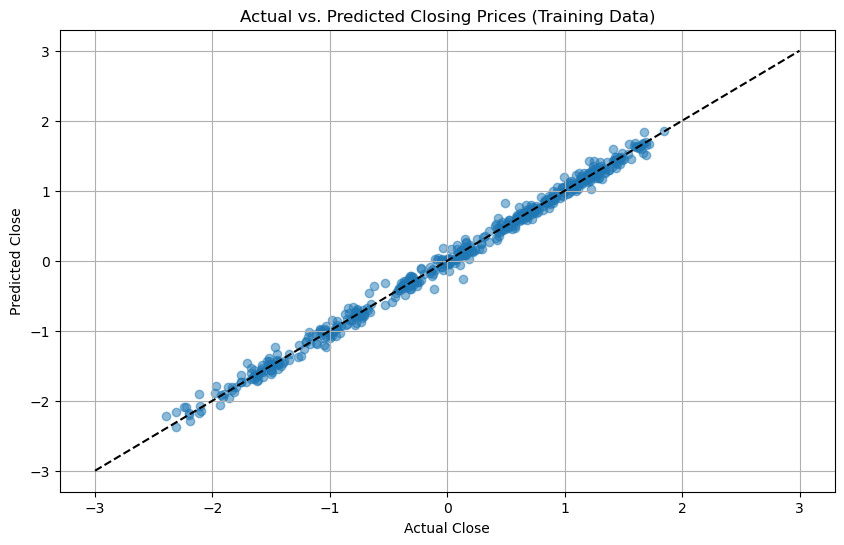

In [19]:
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([-3, 3], [-3, 3], '--k')  
plt.title('Actual vs. Predicted Closing Prices (Training Data)')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.grid(True)
plt.show()


In [20]:
# Testing prediction capability based on regression setup 
# Prediction function
def predict_closing_price(open_price, volume):
    open_std = (open_price - mean_open) / std_open
    volume_std = (volume - mean_volume) / std_volume
    predicted_close_std = model.predict(np.array([[open_std, volume_std]]))
    predicted_close = predicted_close_std * std_close + mean_close
    return predicted_close[0]

In [21]:
import yfinance as yf


In [22]:
# Fetch recent stock data for Apple
apple_data = yf.download('AAPL', start='2023-10-01', end='2023-10-10', interval='1h')
apple_data = apple_data.dropna()

# Predict using the latest available data
predicted_closes = []
for index, row in apple_data.iterrows():
    predicted_close = predict_closing_price(row['Open'], row['Volume'])
    predicted_closes.append(predicted_close)

apple_data['Predicted Close'] = predicted_closes


[*********************100%%**********************]  1 of 1 completed


In [23]:
# Calculate performance metrics
mse_test = mean_squared_error(apple_data['Close'], apple_data['Predicted Close'])
r2_test = r2_score(apple_data['Close'], apple_data['Predicted Close'])

print("MSE (Test):", mse_test)
print("R2 (Test):", r2_test)


MSE (Test): 0.35448811202582986
R2 (Test): 0.9299220999403008


### Mean Squared Error (MSE) Interpretation
MSE = 0.354: This value represents the average squared difference between the predicted and actual closing prices. While lower values are generally better (indicating less error), the interpretability of MSE is highly dependent on the context and the scale of your target variable. In the context of stock prices, which can vary significantly, an MSE of 0.354 suggests that, on average, the model's predictions deviate from the actual closing prices by a margin that might be considered acceptable depending on the volatility of the stock and the precision needs of the user. However, the absolute number should be compared against the typical price range or volatility of Apple’s stock to better assess its significance.
### R-Squared (R²) Interpretation
R² = 0.930: This value is quite high and indicates that approximately 93% of the variance in the actual closing prices is explained by the model’s inputs (the opening prices and trading volumes in this case). A high R² value is generally seen as indicative of a strong model, suggesting that the model does an excellent job in capturing the relationship between the predictors and the target variable. However, as previously noted in your discussions, a high R² in stock price predictions can be misleading if the stock prices do not vary much within the interval being predicted (in this case, hourly), which could naturally lead to a higher R².

                                Close  Predicted Close
Datetime                                              
2023-10-02 09:30:00-04:00  173.330002       171.417841
2023-10-02 10:30:00-04:00  174.104599       173.495941
2023-10-02 11:30:00-04:00  173.350006       174.249543
2023-10-02 12:30:00-04:00  173.309998       173.485087
2023-10-02 13:30:00-04:00  172.789902       173.437823


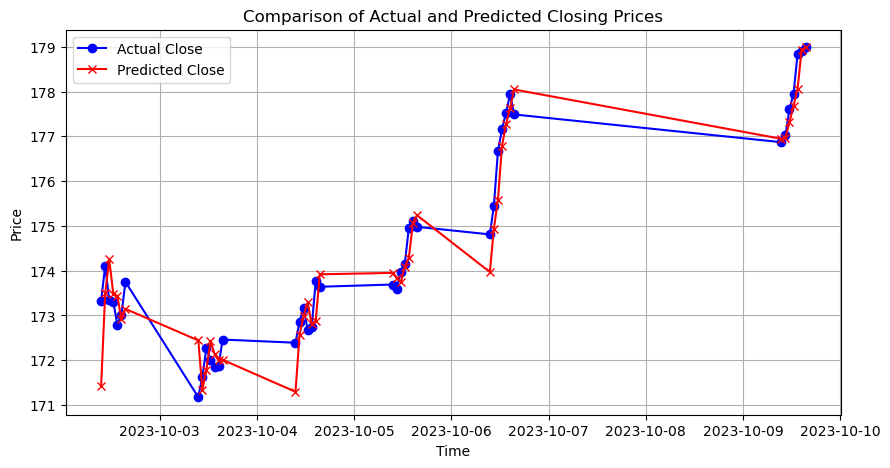

In [26]:
# Displaying a side-by-side comparison of the actual and predicted closing prices
comparison_data = apple_data[['Close', 'Predicted Close']]
print(comparison_data.head())  # Display the first few rows to see a snapshot of the performance

# Additionally, plotting the actual vs. predicted values for a visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(comparison_data['Close'], label='Actual Close', color='blue', marker='o')
plt.plot(comparison_data['Predicted Close'], label='Predicted Close', color='red', marker='x')
plt.title('Comparison of Actual and Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
